<a href="https://colab.research.google.com/github/barbaramit/jogando-os-dados/blob/main/Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 


## Obtenção dos Dados

Os dados foram obtidos a partir de um projeto realizado pela [Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data). Uma organização sem fundos lucrativos do Reino Unido, focada no avanço da educação mundial. 

Diariamente, eles atualizam os dados em seu repositório no GitHub, disponibilizando dados atuais de como está a doença no mundo.

A seguir, o dicionário das variáveis que iremos analisar. No Github está disponível o significado de todas as variáveis.

### Dicionário de Variáveis
* `iso_code` - Código de identificação do país
* `continent` - Continente onde o país está localizado
* `location` - Localização geográfica do país
* `date` - Data da observação
* `total_cases` - Total de casos confirmados
* `new_cases` - Novos casos confirmados
* `total_deaths` - Total acumulado de mortes por COVID-19 até a data em questão
* `new_deaths` - Total de mortes na data em questão
* `total_tests` - Total acumulado de testes realizados
* `total_vaccinations` - Total de doses administradas da vacina contra a COVID-19
* `people_vaccinated` - Total de pessoas que receberam ao menos uma dose da vacina contra a COVID-19
* `people_fully_vaccinated` - Total de pessoas que estão completamente vacinadas (duas doses ou não) contra a COVID-19
* `population	` - População em 2020
* `gdp_per_capita` - Produto Interno Bruto (PIB) per capita
* `life_expectancy` - Expectativa de vida ao nascer em 2019

### Importando os dados do COVID-19

    

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib
import seaborn as sns
import missingno
import plotly.express as px
import plotly.graph_objects as go  
from pywaffle import Waffle

%matplotlib inline


# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv("owid-covid-data.csv")

In [1]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
df.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
59653,GEO,Asia,Georgia,2021-11-08,755046.0,2191.0,4808.286,10509.0,74.0,60.000,...,5.3,55.5,NaN,2.6,73.77,0.812,NaN,NaN,NaN,NaN
1439,OWID_AFR,NaN,Africa,2021-12-13,8999010.0,17081.0,29840.000,224964.0,109.0,131.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61416,GIB,Europe,Gibraltar,2020-05-10,146.0,0.0,0.286,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.93,NaN,NaN,NaN,NaN,NaN
22710,BRA,South America,Brazil,2021-09-13,21012064.0,8648.0,15333.571,587400.0,284.0,469.714,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
51542,OWID_EUR,NaN,Europe,2020-09-27,4888734.0,44743.0,58994.857,220699.0,346.0,587.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Análise Exploratória dos Dados**

Com o objetivo de entender o dataset e extrair informações valiosas dele, irei verificar algumas informações por meio da análise exploratória. 




#### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

df.dtypes

Entradas:	 176221
Variáveis:	 67



iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

Este dataframe possui 176.221 entradas e 67 variáveis.

Há apenas dois tipos de dados: `float64` e `object`. Todas as variáveis estão em seus respectivos tipos de dados, exceto `date`.

In [ ]:
# nossas 67 variáveis
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
# transformando date de object -> datetime
df['date'] = pd.to_datetime(df['date'])

#### **Período do dataset**

In [ ]:
inicio = df.date.min().strftime('%d/%m/%Y')
fim = df.date.max().strftime('%d/%m/%Y')

print("Nosso dataset tem dados do dia {} até o dia {}".format(inicio, fim))

Nosso dataset tem dados do dia 01/01/2020 até o dia 03/04/2022


#### **Qual a porcentagem de valores ausentes no dataset?**


In [ ]:
print(((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)[:15])

weekly_icu_admissions_per_million          96.753508
weekly_icu_admissions                      96.753508
excess_mortality_cumulative_per_million    96.582133
excess_mortality                           96.582133
excess_mortality_cumulative                96.582133
excess_mortality_cumulative_absolute       96.582133
weekly_hosp_admissions_per_million         93.529148
weekly_hosp_admissions                     93.529148
total_boosters                             88.508180
total_boosters_per_hundred                 88.508180
icu_patients_per_million                   86.621345
icu_patients                               86.621345
hosp_patients                              85.826320
hosp_patients_per_million                  85.826320
new_vaccinations                           77.621282
dtype: float64


In [ ]:
print(((df.isnull().sum() / df.shape[0])*100).sort_values()[:15])

iso_code                           0.000000
location                           0.000000
date                               0.000000
population                         0.626486
total_cases                        3.584136
new_cases                          3.711816
total_cases_per_million            4.030734
new_cases_per_million              4.158415
new_cases_smoothed                 4.843918
new_cases_smoothed_per_million     5.287111
continent                          5.863660
life_expectancy                    6.517952
population_density                10.926053
diabetes_prevalence               13.628342
total_deaths                      13.842278
dtype: float64


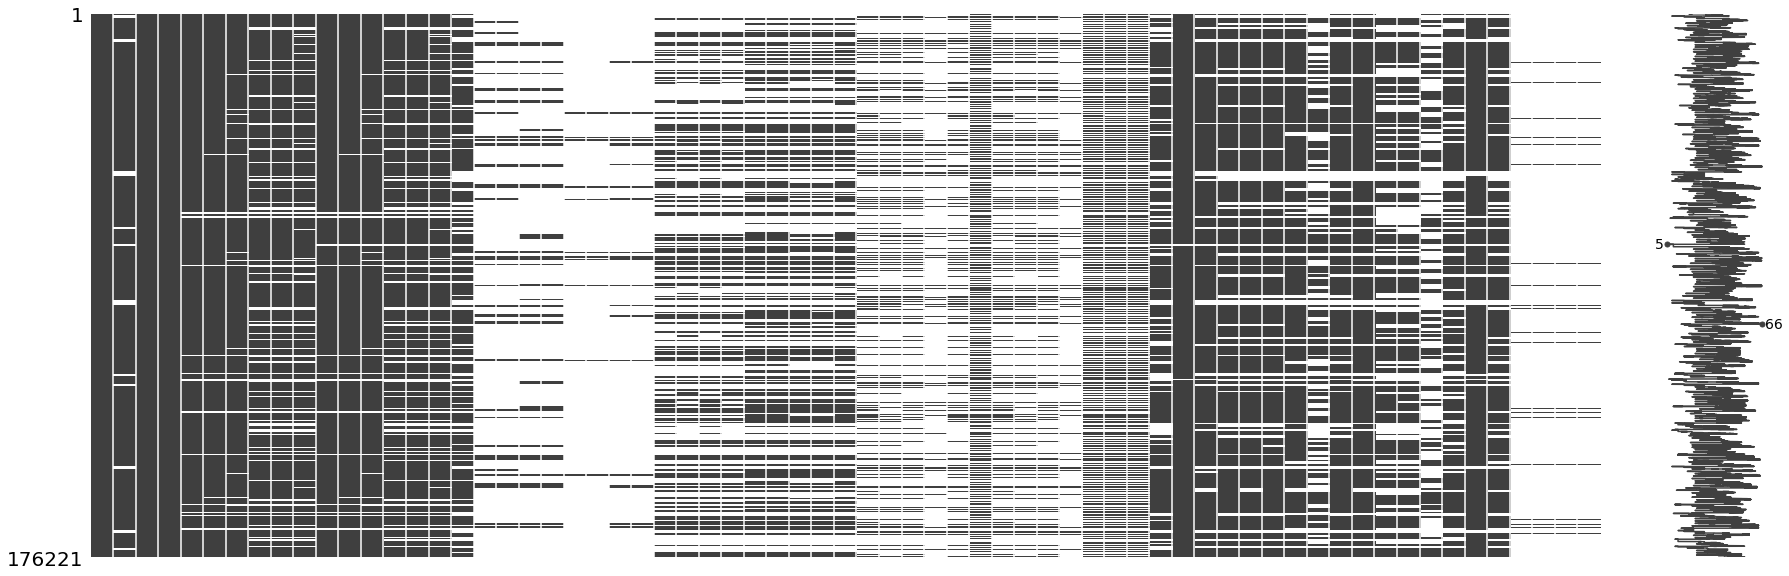

In [ ]:
missingno.matrix(df, figsize=(30,10));

#### **Qual o tipo de distribuição das variáveis?**

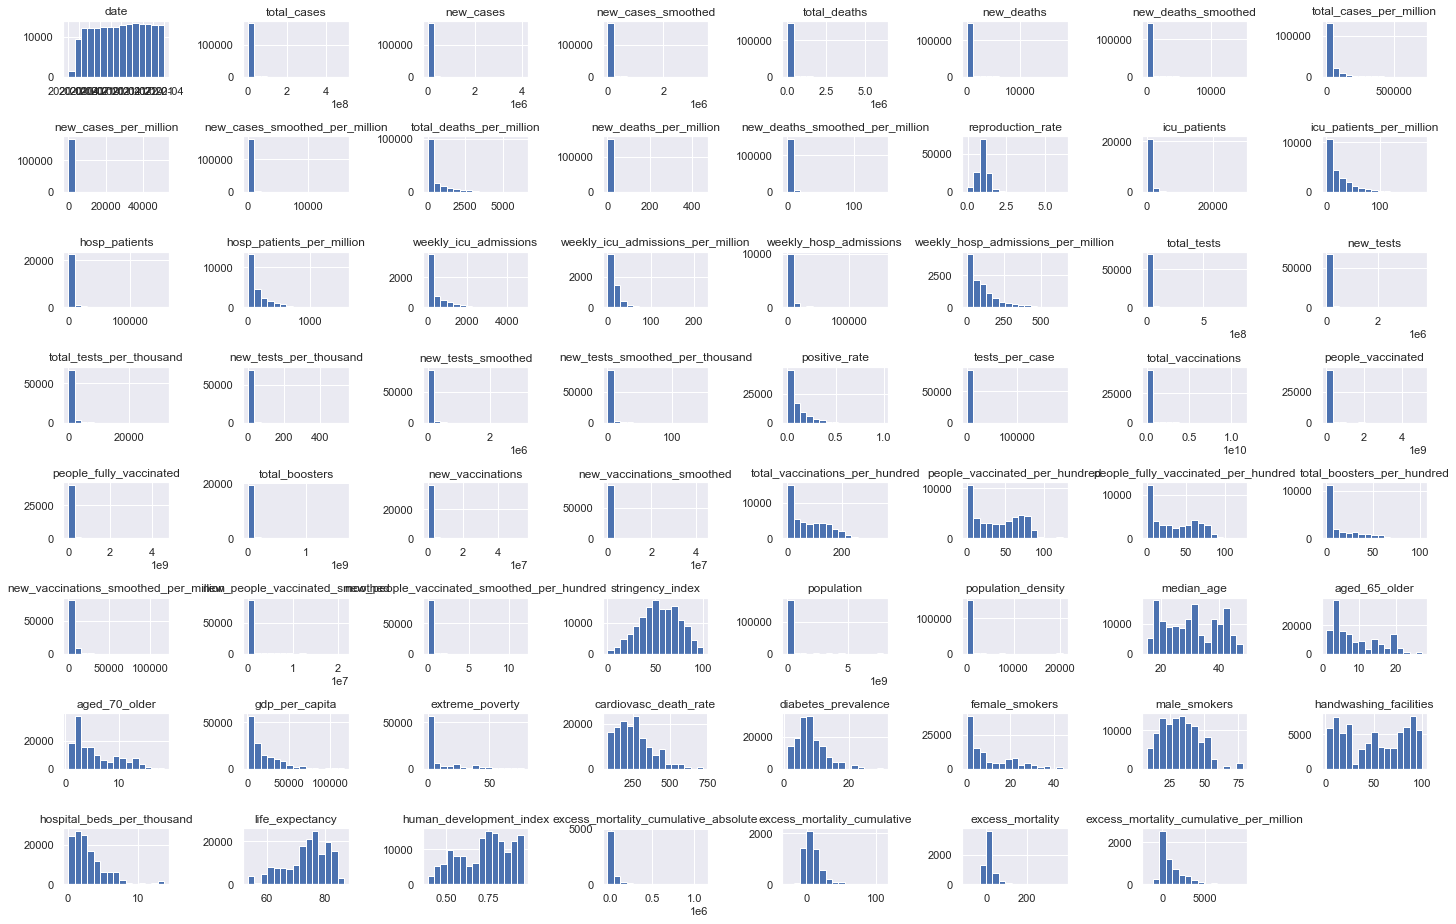

In [ ]:
# plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(20,13))
sns.set()
plt.tight_layout()

In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.699050e+05,1.696800e+05,1.676850e+05,1.518280e+05,151827.000000,149664.000000,169118.000000,168893.000000,166904.000000,151054.000000,...,110341.000000,108828.000000,71500.000000,128832.000000,164735.000000,141910.000000,6.023000e+03,6023.000000,6023.000000,6023.000000
mean,2.778422e+06,1.231405e+04,1.234481e+04,6.008428e+04,168.132737,169.926112,33260.929702,179.617127,179.225894,535.809184,...,10.643637,32.784011,50.851868,3.027623,73.671496,0.725445,3.859263e+04,9.562316,15.841307,1023.021273
std,1.717614e+07,8.845232e+04,8.689349e+04,3.143783e+05,821.051479,806.451617,60613.886965,739.818055,571.615849,815.769781,...,10.580256,13.523895,31.811170,2.447388,7.464024,0.149851,1.072522e+05,16.273081,29.596734,1458.955743
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.226000e+03,1.000000e+00,7.000000e+00,8.400000e+01,0.000000,0.143000,661.157000,0.033000,1.627000,20.032000,...,1.900000,21.600000,20.859000,1.300000,69.590000,0.602000,-4.500000e+01,-0.455000,-0.580000,-19.127442
50%,2.941100e+04,7.900000e+01,1.080000e+02,8.230000e+02,2.000000,2.429000,5172.605000,11.348000,19.314000,142.663000,...,6.300000,31.400000,49.839000,2.400000,75.090000,0.743000,3.525700e+03,6.290000,7.420000,508.816121
75%,3.237200e+05,1.077000e+03,1.176571e+03,7.691000e+03,19.000000,21.143000,41760.105250,103.558000,125.581250,764.827250,...,19.300000,41.300000,82.502000,4.000000,79.190000,0.845000,2.611140e+04,14.610000,22.485000,1690.745408
max,4.914415e+08,4.089078e+06,3.436882e+06,6.152898e+06,18156.000000,14795.857000,706541.904000,51427.491000,16052.608000,6364.860000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.111864e+06,111.010000,375.000000,9339.469641


#### **Total de casos**

In [ ]:
df.sort_values(by="total_cases", ascending=False)[:10]


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
174004,OWID_WRL,NaN,World,2022-04-03,491441483.0,777421.0,1387343.000,6152898.0,1643.0,4088.143,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
174003,OWID_WRL,NaN,World,2022-04-02,490664062.0,1055332.0,1406584.429,6151255.0,2661.0,4190.714,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
174002,OWID_WRL,NaN,World,2022-04-01,489608730.0,1170974.0,1449590.429,6148594.0,5460.0,4228.286,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
174001,OWID_WRL,NaN,World,2022-03-31,488437812.0,1874508.0,1545464.143,6143147.0,4797.0,4729.286,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
174000,OWID_WRL,NaN,World,2022-03-30,486563304.0,1589756.0,1527972.857,6138350.0,5038.0,4798.571,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
173999,OWID_WRL,NaN,World,2022-03-29,484973548.0,1750295.0,1554156.714,6133312.0,5020.0,4912.857,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
173998,OWID_WRL,NaN,World,2022-03-28,483223253.0,1493115.0,1586314.429,6128559.0,3998.0,4895.857,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
173997,OWID_WRL,NaN,World,2022-03-27,481730138.0,912111.0,1583086.714,6124561.0,2361.0,5020.286,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
173996,OWID_WRL,NaN,World,2022-03-26,480818027.0,1356374.0,1605687.714,6122200.0,2924.0,5120.857,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
173995,OWID_WRL,NaN,World,2022-03-25,479461653.0,1842090.0,1656138.714,6119276.0,8967.0,5250.571,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


Há uma entrada chamada World, que representa os valores do mundo inteiro.

In [ ]:
df.sort_values(by="total_cases", ascending=False)[:1]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
174004,OWID_WRL,NaN,World,2022-04-03,491441483.0,777421.0,1387343.0,6152898.0,1643.0,4088.143,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


No dia 03/04/2022, o total de casos = 491.441.483 e o total de mortes = 6.152.898

## **Dados do mundo**

In [ ]:
# dados do mundo entre 22/01/2020 e 03/04/2022
df_world = df[df["location"] == "World"].copy()

#### **Média diária de novos casos**

In [ ]:
# agrupando dados por data e novos casos 
novosCasosDia = df_world.groupby('date')[['new_cases']].sum()

# agrupando dados por dias e verificando a média de novos casos diários
mediaNovosCasosDia = novosCasosDia.resample('d').sum().round().mean()

print('A média diária de novos casos foi de {} e o máximo de novos casos em 1 dia foi de {}'
      .format(int(mediaNovosCasosDia[0]), int(df_world.new_cases.max())))


A média diária de novos casos foi de 610563 e o máximo de novos casos em 1 dia foi de 4089078


In [ ]:
# por mês

# agrupando dados por mês e verificando a média de novos casos (mensal)
mediaNovosCasosMes = novosCasosDia.resample('M').sum().round().mean()

# agrupando dados por mês e verificando o máximo de novos casos (mensal)
maximoNovosCasosMes = novosCasosDia.resample('M').sum().round().max()

totalCasosMes = novosCasosDia.resample('M').sum().round()[-15:-1]

print('A média mensal de novos casos foi de {} e o máximo de novos casos em 1 mês foi de {}'
      .format(int(mediaNovosCasosMes[0].round()), int(maximoNovosCasosMes[0])))

A média mensal de novos casos foi de 17510086 e o máximo de novos casos em 1 mês foi de 89374078


In [ ]:
# função para o eixo y 
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return '%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)


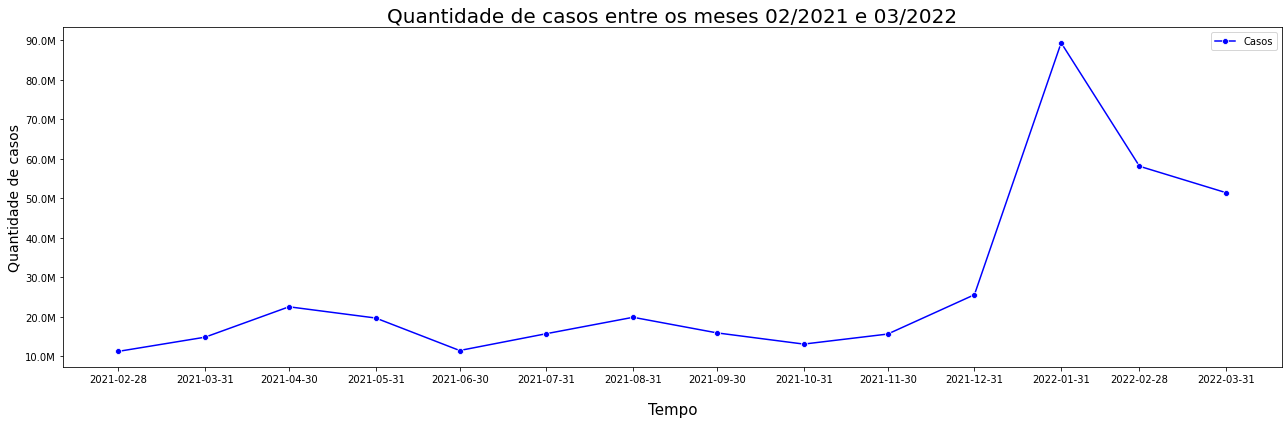

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))  

ax = sns.lineplot(x='date',
                  y='new_cases',
                  data=totalCasosMes,
                  marker='o',
                  color="b")

# titulo
ax.set_title('Quantidade de casos entre os meses 02/2021 e 03/2022', fontsize=20)

# legenda
ax.legend(['Casos'], loc='upper right')

ax.set_xlabel('Tempo', fontsize=15, labelpad=18)
ax.set_ylabel('Quantidade de casos', fontsize=14)

# escala do eixo x
plt.xticks(totalCasosMes.index)

# escala do eixo y
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()

#### **Média mensal de mortes**

In [ ]:
# agrupando dados por data e novos casos 
novasMortesDia = df_world.groupby('date')[['new_deaths']].sum()

# agrupando dados por dias e verificando a média de novos casos diários
mediaNovasMortesDia = novasMortesDia.resample('M').sum().round().mean()

# agrupando dados por dias e verificando o máximo de novos casos diários
maximoNovasMortesDia = novasMortesDia.resample('M').sum().round().max()

totalMortesMes = novasMortesDia.resample('M').sum().round()[-15:-1]


print('A média mensal de mortes foi de {} e o máximo de falecimentos em 1 mês foi de {}'
      .format(int(mediaNovasMortesDia[0].round()), int(maximoNovasMortesDia[0])))

A média mensal de mortes foi de 218525 e o máximo de falecimentos em 1 mês foi de 417837


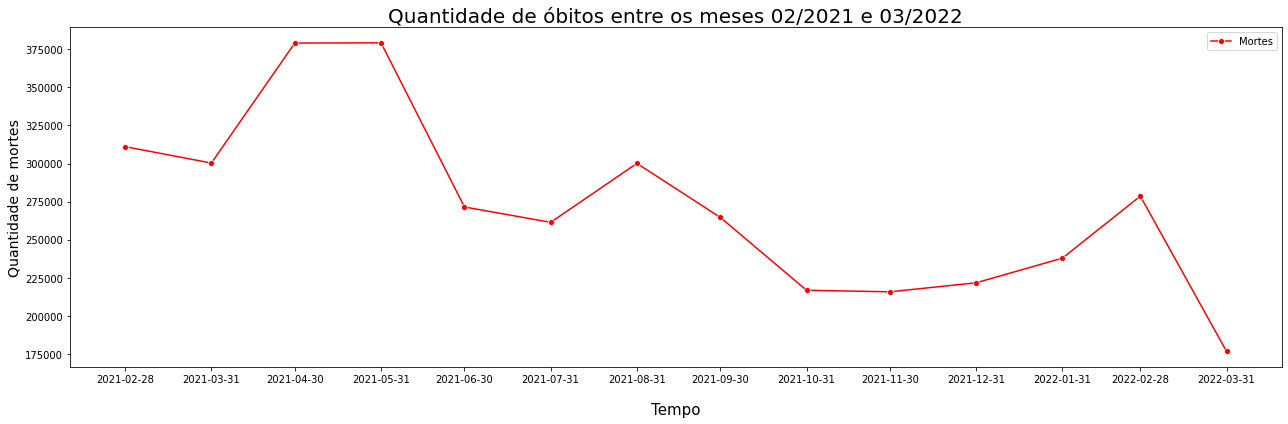

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))  

ax = sns.lineplot(x='date',
                  y='new_deaths',
                  data=totalMortesMes,
                  marker='o',
                  color="r")

# titulo
ax.set_title('Quantidade de óbitos entre os meses 02/2021 e 03/2022', fontsize=20)

# legenda
ax.legend(['Mortes'], loc='upper right')

ax.set_xlabel('Tempo', fontsize=15, labelpad=18)
ax.set_ylabel('Quantidade de mortes', fontsize=14)

# escala do eixo x
plt.xticks(totalMortesMes.index)

plt.tight_layout()

## **Dados dos Países**

In [ ]:
df_paises = df.drop(df[df.continent.isnull()].index, axis=0).copy()

In [ ]:
top10Paises = df_paises.loc[df.date == '2022-04-03'].sort_values(by="total_cases", ascending=False)[:10]

In [ ]:
top10Paises

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
166804,USA,North America,United States,2022-04-03,80155397.0,4586.0,27994.714,982565.0,32.0,800.286,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
73995,IND,Asia,India,2022-04-03,43029044.0,913.0,1188.714,521358.0,13.0,46.143,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
22912,BRA,South America,Brazil,2022-04-03,30002785.0,7210.0,21863.571,660410.0,39.0,178.714,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
56780,FRA,Europe,France,2022-04-03,26051185.0,102266.0,138398.857,142575.0,31.0,119.143,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
60597,DEU,Europe,Germany,2022-04-03,21706329.0,115182.0,NaN,130052.0,65.0,NaN,...,28.2,33.1,NaN,8.00,81.33,0.947,NaN,NaN,NaN,NaN
166001,GBR,Europe,United Kingdom,2022-04-03,21285727.0,NaN,NaN,165721.0,NaN,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
131958,RUS,Europe,Russia,2022-04-03,17636019.0,16498.0,18783.143,362304.0,296.0,326.143,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
161799,TUR,Asia,Turkey,2022-04-03,14894731.0,9021.0,13436.286,98157.0,38.0,51.000,...,14.1,41.1,NaN,2.81,77.69,0.820,NaN,NaN,NaN,NaN
80168,ITA,Europe,Italy,2022-04-03,14845815.0,55009.0,68727.429,159784.0,118.0,143.143,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
148356,KOR,Asia,South Korea,2022-04-03,14001406.0,127190.0,285478.857,17453.0,218.0,323.857,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN


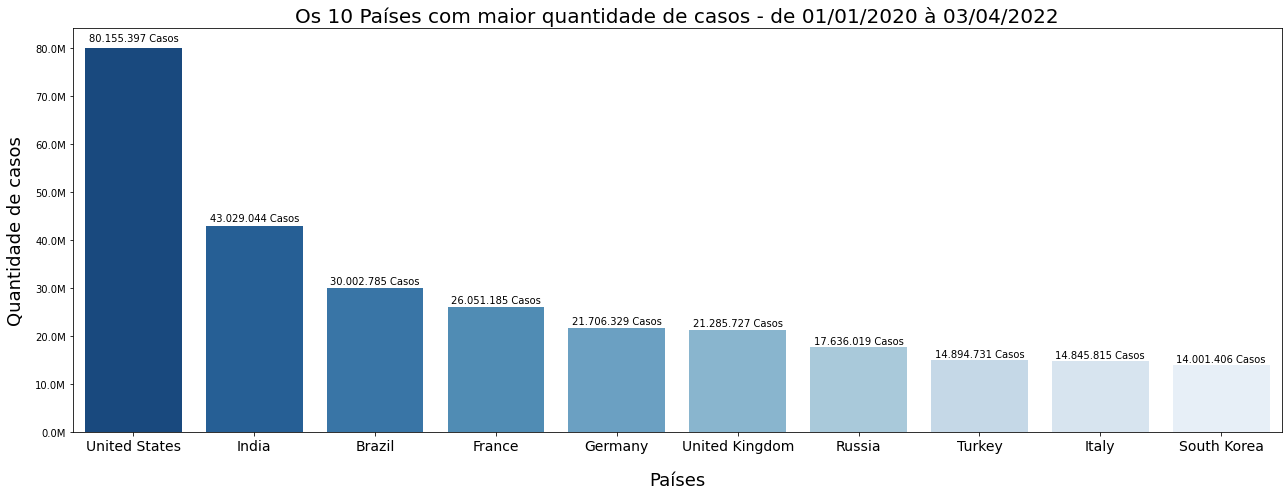

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))  

ax = sns.barplot(
    x=top10Paises.location,
    y=top10Paises.total_cases,
    palette="Blues_r"
)

# titulo
ax.set_title('Os 10 Países com maior quantidade de casos - de {} à {}'.format(inicio, fim), fontsize=20)

ax.set_xlabel('Países', fontsize=18, labelpad=18)
ax.set_ylabel('Quantidade de casos', fontsize=18, labelpad=10)

# escala do eixo x
plt.xticks(size=14)

# escala do eixo y
ax.yaxis.set_major_formatter(formatter)


ax = plt.grid(False)

# definindo variáveis de anotações do gráfico
numtotal = range(top10Paises.shape[0])
countArtista = top10Paises.total_cases.values

# visualização dos valores em cada barra
for i in numtotal:
    plt.annotate("{0:,} Casos".format(int(countArtista[i])).replace(',','.'),
                 xy=(numtotal[i], countArtista[i]  * 1.011),
                 fontsize=10,
                 ha='center',
                 va='bottom')

plt.tight_layout()

In [ ]:
top10Mortes = df_paises.groupby('location').total_deaths.max().sort_values(ascending=False)[:10].reset_index()

In [ ]:
top10Mortes

,location,total_deaths
0,United States,982565.0
1,Brazil,660410.0
2,India,521358.0
3,Russia,362304.0
4,Mexico,323223.0
5,Peru,212328.0
6,United Kingdom,165721.0
7,Italy,159784.0
8,Indonesia,155164.0
9,France,142575.0


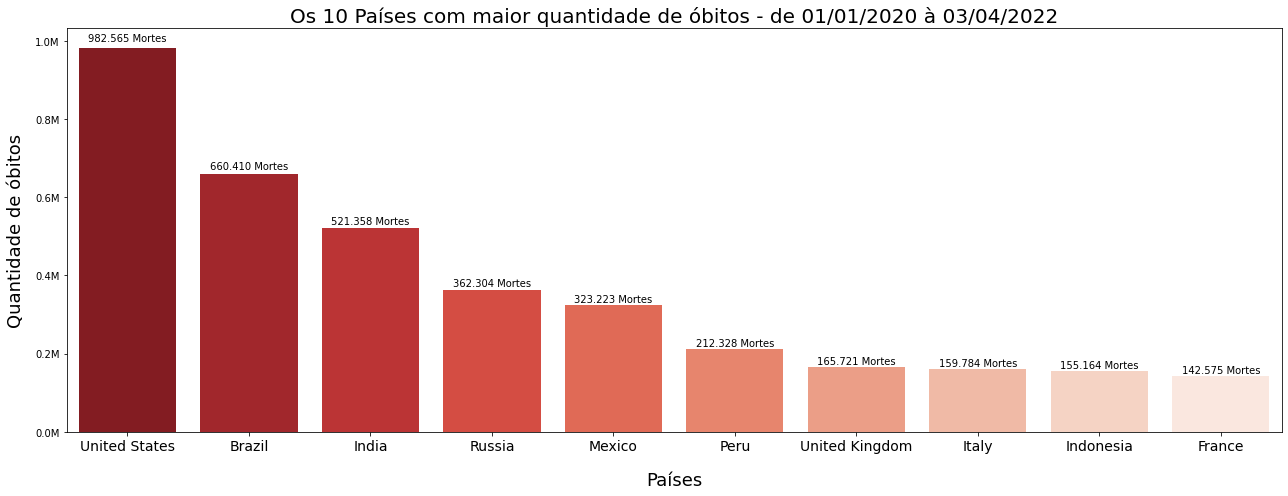

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))  

ax = sns.barplot(
    x=top10Mortes.location,
    y=top10Mortes.total_deaths,
    palette="Reds_r"
)

# titulo
ax.set_title('Os 10 Países com maior quantidade de óbitos - de {} à {}'.format(inicio, fim), fontsize=20)

ax.set_xlabel('Países', fontsize=18, labelpad=18)
ax.set_ylabel('Quantidade de óbitos', fontsize=18, labelpad=10)

# escala do eixo x
plt.xticks(size=14)

# escala do eixo y
ax.yaxis.set_major_formatter(formatter)


ax = plt.grid(False)

# definindo variáveis de anotações do gráfico
numPaises = range(top10Mortes.shape[0])
numMortes = top10Mortes.total_deaths.values

# visualização dos valores em cada barra
for i in numPaises:
    plt.annotate("{0:,} Mortes".format(int(numMortes[i])).replace(',','.'),
                 xy=(numPaises[i], numMortes[i]  * 1.011),
                 fontsize=10,
                 ha='center',
                 va='bottom')

plt.tight_layout()

In [ ]:
df_world.set_index('date', inplace=True)
df_paises.set_index('date', inplace=True)


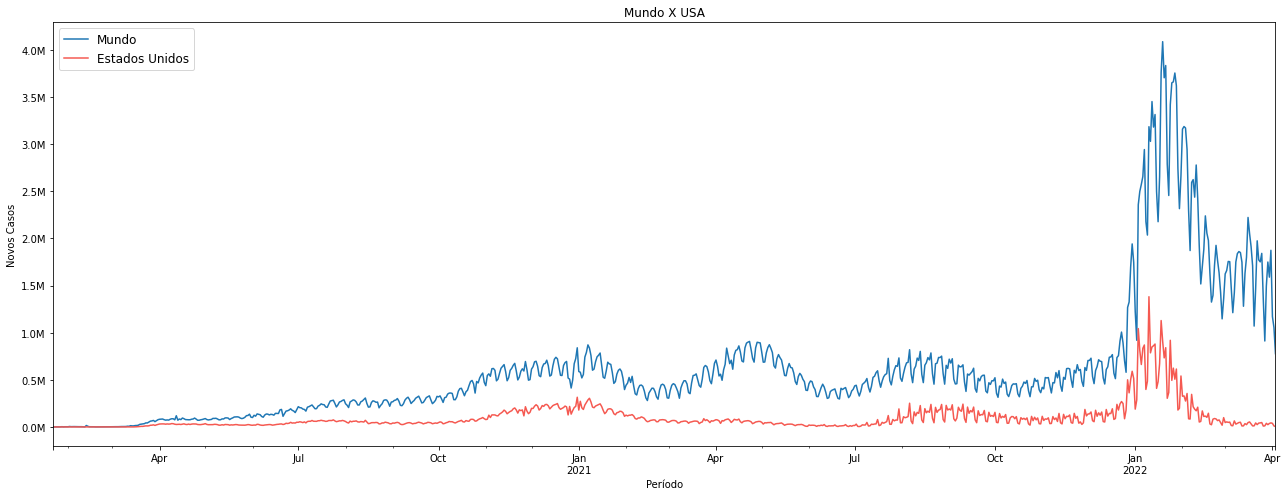

In [ ]:
#plot da progressão de novos casos pelo mundo e no USA

fig, ax = plt.subplots(figsize=(18,7))

df_world.new_cases.plot(ax=ax, label= "Mundo")
df_paises[df_paises["location"] == "United States"].new_cases.plot(ax=ax, label= "Estados Unidos", color='#f55951')

ax.set_title("Mundo X USA")
ax.set_xlabel('Período')
ax.set_ylabel("Novos Casos")
ax.legend(fontsize=12)
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()

In [ ]:
df_paises = df_paises.reset_index()


In [ ]:
top50Paises = df_paises.loc[df_paises.date == '2022-04-03'].sort_values(by="total_cases", ascending=False)[:50]

In [ ]:
# criando função para os calculos proporcionais

def deaths_prop(registro):
  return (registro['total_deaths'] / registro['population']) * 100

def cases_prop(registro):
  return (registro['total_cases'] / registro['population']) * 100


top10Paises['population_deaths_proporcion'] = top10Paises.apply(deaths_prop, axis=1)
top10Paises['population_cases_proporcion'] = top10Paises.apply(cases_prop, axis=1)

top50Paises['population_deaths_proporcion'] = top50Paises.apply(deaths_prop, axis=1)
top50Paises['population_cases_proporcion'] = top50Paises.apply(cases_prop, axis=1)

In [ ]:
fig = px.scatter(top50Paises, x = "gdp_per_capita", y = "life_expectancy", size = "total_deaths", color = 'total_deaths', 
               hover_name = "location", size_max = 60, log_x=True, width = 1000, color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(title=go.layout.Title(text="<b>Logaritmo do PIB per capita X Expectativa de vida</b>", x=0.080, y=0.99, font=dict(
                family="sans-serif",
                size=20,
            )))

fig.add_annotation(text="<b>Tamanho</b>: Total de mortes",
                   xref="paper", yref="paper", x=-0.005, y=1.078, showarrow=False)

fig.update_xaxes(title = 'Log PIB per capita', showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(title = 'Expectativa de vida', showline=True, linewidth=2, linecolor='black')

fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})

fig.show()

In [ ]:
fig = px.scatter(top50Paises, x = "gdp_per_capita", y = "total_deaths", size = "population", color = 'total_deaths', 
               hover_name = "location", color_continuous_scale=px.colors.sequential.Viridis, size_max = 80, width = 1000)

fig.update_layout(title=go.layout.Title(text="<b>PIB per capita X Total de mortos</b>", x=0.080, y=0.99, font=dict(
                family="sans-serif",
                size=20,
            )))

fig.add_annotation(text="<b>Tamanho</b>: População",
                   xref="paper", yref="paper", x=-0.005, y=1.078, showarrow=False)

fig.update_xaxes(title = 'PIB per capita', showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(title = 'Total de óbitos', showline=True, linewidth=2, linecolor='black')

fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})

fig.show()

In [ ]:
fig = px.scatter(top50Paises, x = "life_expectancy", y = "population_deaths_proporcion", size="population", 
                 color = 'total_deaths', hover_name = "location", size_max = 80, width = 1000,
                 color_continuous_scale=px.colors.sequential.Viridis) 

fig.update_xaxes(title = 'Expectativa de vida', showgrid=False, showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(title = '% de Mortos da População', showgrid=False, rangemode="tozero", showline=True, linewidth=2, linecolor='black')

fig.update_layout(title=go.layout.Title(text="<b>Impacto da COVID-19 na População (Mortalidade)</b>", x=0.080, y=0.99, font=dict(
                family="sans-serif",
                size=20,
            )))

fig.add_annotation(text="Relação entre % populacional de mortos dos países e sua expectativa de Vida. <b>Tamanho</b>: População",
                   xref="paper", yref="paper", x=-0.001, y=1.078, showarrow=False)

fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})

fig.show()

In [ ]:
fig = px.scatter(top50Paises, x = "life_expectancy", y = "population_cases_proporcion", color = 'total_cases', 
                  size="population", hover_name = "location", size_max = 80, width = 1000,
                  color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(title=go.layout.Title(text="<b>Impacto da COVID-19 na População (Infectados)</b>",  x=0.080, y=0.99, font=dict(
                family="sans-serif",
                size=20,
            )))

fig.add_annotation(text="Relação entre % populacional de infectados dos países e sua expectativa de vida. <b>Tamanho</b>: População",
                   xref="paper", yref="paper", x=-0.001, y=1.078, showarrow=False)

fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})


fig.update_xaxes(title = 'Expectativa de vida', showgrid=False, showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(title = '% de Infectados da População', showgrid=False, rangemode="tozero", showline=True, linewidth=2, linecolor='black')
fig.show()

## **Análise Exploratória para o Brasil**



In [ ]:
df_brasil = df[df["location"] == "Brazil"].copy()

In [ ]:
inicioBR = df_brasil.date.min().strftime('%d/%m/%Y')
fimBR = df_brasil.date.max().strftime('%d/%m/%Y')

print("Nosso dataset tem dados do dia {} até o dia {}".format(inicioBR, fimBR))

Nosso dataset tem dados do dia 26/02/2020 até o dia 03/04/2022


In [ ]:
# Identificar quando foi registrado o primeiro caso e a primeira morte no Brasil
caso1 = df_brasil[df_brasil["new_cases"] == 1.0].date
morte1 = df_brasil[df_brasil["new_deaths"] == 1.0].date

delta = morte1.min() - caso1.min()
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil. O 1°caso foi no dia {} e a primeira morte {}'.format(delta.days, caso1.min().date().strftime('%d/%m/%Y'), morte1.min().date().strftime('%d/%m/%Y'))) 

Se passaram 20 dias entre o primeiro caso e a primeira morte no Brasil. O 1°caso foi no dia 26/02/2020 e a primeira morte 17/03/2020


In [ ]:
novosCasosDiaBR = df_brasil.groupby('date')[['new_cases']].sum()
totalCasosMesBR = novosCasosDiaBR.resample('M').sum().round()[-15:-1]

novasMortesDiaBR = df_brasil.groupby('date')[['new_deaths']].sum()
totalMortesMesBR = novasMortesDia.resample('M').sum().round()[-15:-1]

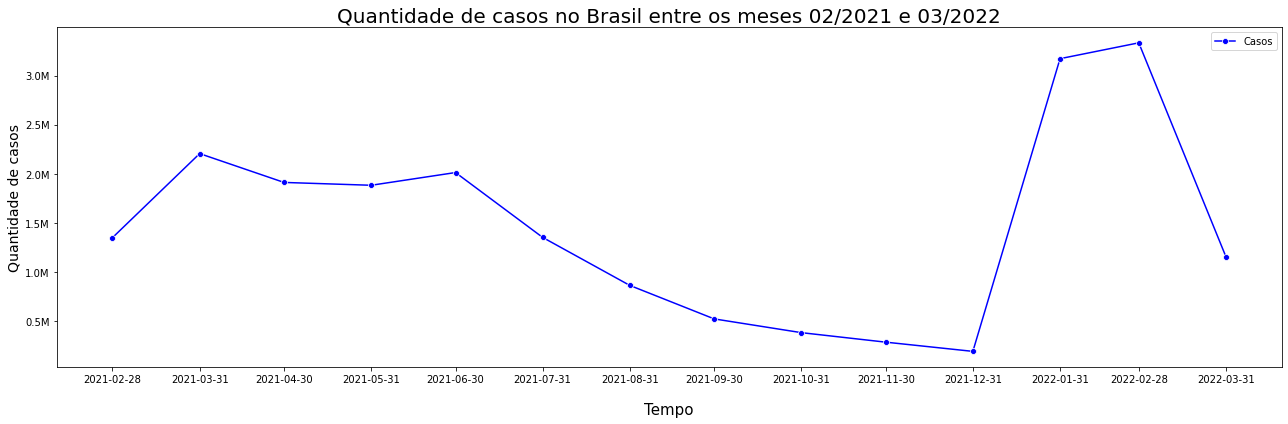

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))  

ax = sns.lineplot(x='date',
                  y='new_cases',
                  data=totalCasosMesBR,
                  marker='o',
                  color="b")

# titulo
ax.set_title('Quantidade de casos no Brasil entre os meses 02/2021 e 03/2022', fontsize=20)

# legenda
ax.legend(['Casos'], loc='upper right')

ax.set_xlabel('Tempo', fontsize=15, labelpad=18)
ax.set_ylabel('Quantidade de casos', fontsize=14)

# escala do eixo x
plt.xticks(totalCasosMesBR.index)

# escala do eixo y
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()

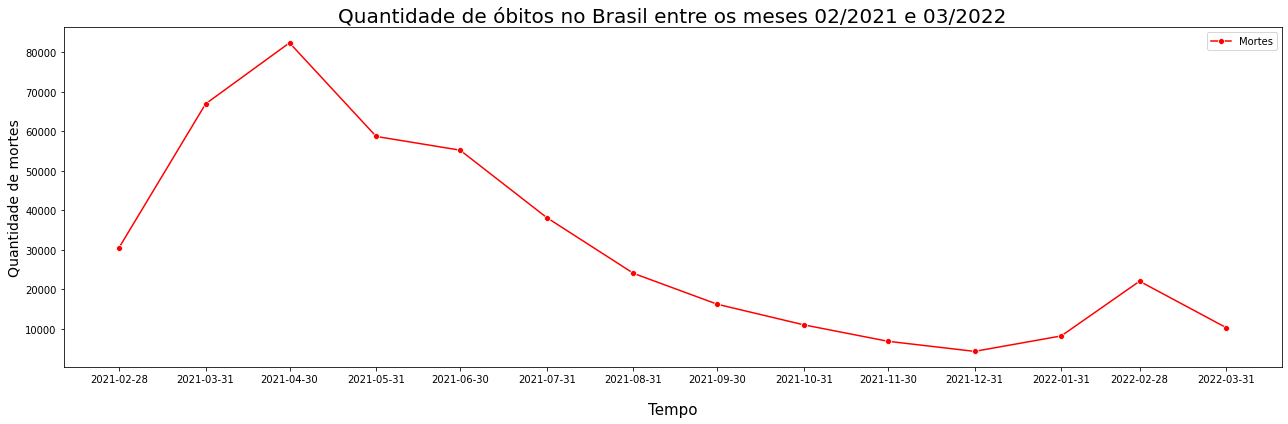

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))  

ax = sns.lineplot(x='date',
                  y='new_deaths',
                  data=totalMortesMesBR,
                  marker='o',
                  color="r")

# titulo
ax.set_title('Quantidade de óbitos no Brasil entre os meses 02/2021 e 03/2022', fontsize=20)

# legenda
ax.legend(['Mortes'], loc='upper right')

ax.set_xlabel('Tempo', fontsize=15, labelpad=18)
ax.set_ylabel('Quantidade de mortes', fontsize=14)

# eixo x
plt.xticks(totalMortesMesBR.index)


plt.tight_layout()

In [ ]:
vacinados_completos = df_brasil['people_fully_vaccinated'].max() / df_brasil['population'].max() * 100

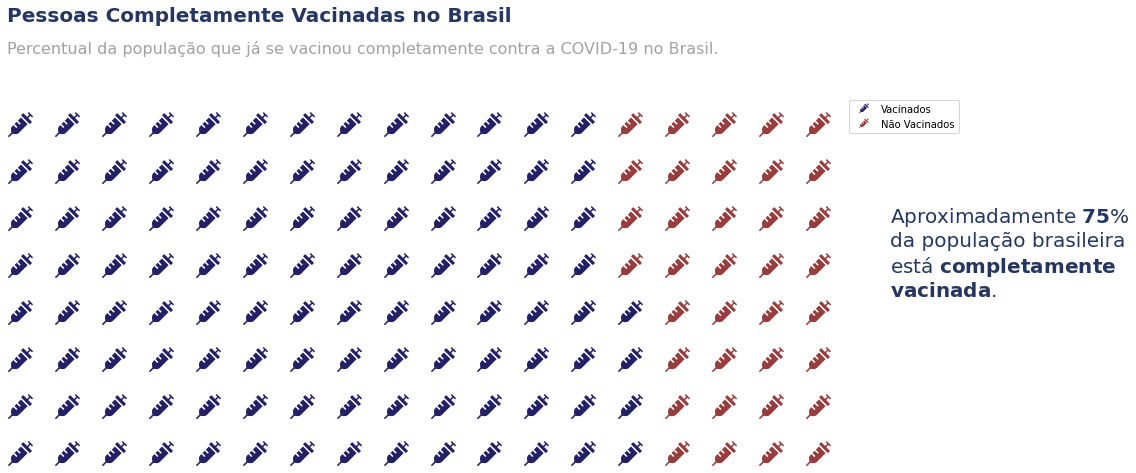

In [ ]:
# Percentual de vacinados completos

fig = plt.figure(
    FigureClass=Waffle,
    figsize=(15,8),
    rows=8,
    columns=18,
    colors=("#232066", "#983D3D"),
    values=[vacinados_completos, 100-vacinados_completos], icons='syringe', icon_size=25,
    icon_legend=True,
    legend={
        'labels': ['Vacinados', 'Não Vacinados'],
        'loc': 'upper left',
        'bbox_to_anchor': (1, 1)
    }
)

plt.text(0, 1.2, 'Pessoas Completamente Vacinadas no Brasil',
         fontsize=20, 
         color="#253760",
         weight='bold')

plt.text(0, 1.15,
         "Percentual da população que já se vacinou completamente contra a COVID-19 no Brasil.",
         verticalalignment="top",
         fontsize=16,
         color="#A2A1A3")

plt.text(2.4, 0.7,
         "Aproximadamente $\\bf{75}$%\n"
         "da população brasileira\n"
         "está $\\bf{completamente}$\n"
         "$\\bf{vacinada}$."
         ,
         verticalalignment="top",
         fontsize=20,
         color="#253760")

fig.set_tight_layout(False)
plt.show();